In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image 1 shape: (256, 320, 3)
Image 2 shape: (256, 320, 3)
Image 3 shape: (256, 324, 3)


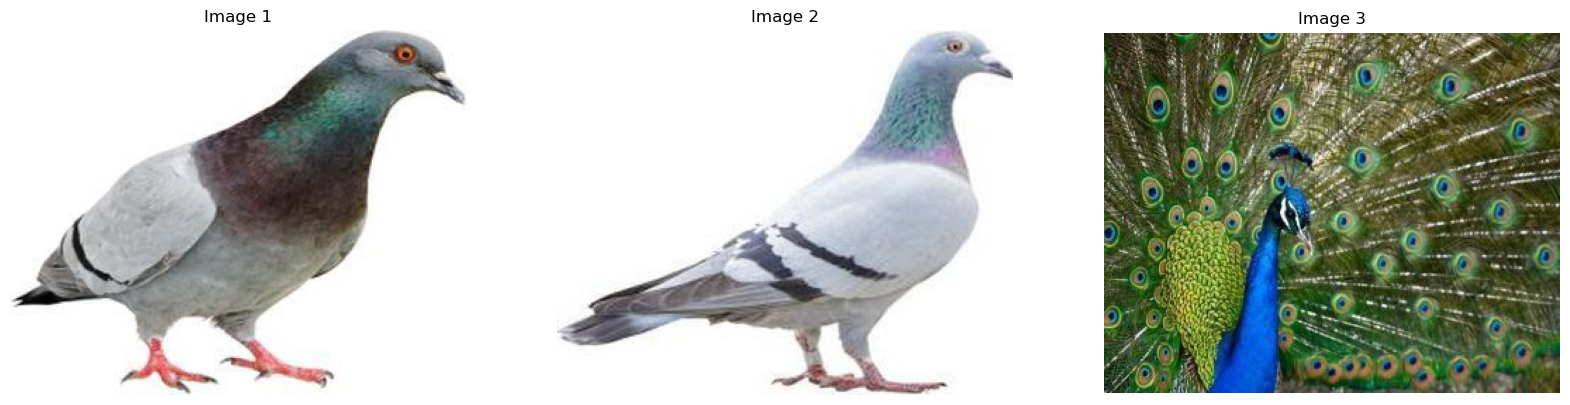

In [3]:
query_img = cv2.imread('queryimage.png')
ref_img1 = cv2.imread('refimage1.png')
ref_img2 = cv2.imread('refimage2.png')

images = [query_img, ref_img1, ref_img2]

for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    print(f"Image {i+1} shape: {images[i].shape}")

plt.figure(figsize=(20, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Image {i+1}")
    plt.axis('off')
plt.show()

In [4]:
def hist_norm(img,bin_size=256):
    hist = cv2.calcHist([img],[0,1,2],None,[bin_size,bin_size,bin_size],[0,256,0,256,0,256])
    norm_hist = cv2.normalize(hist,hist).flatten()
    return norm_hist

In [5]:
norm_hists = [hist_norm(img) for img in images]

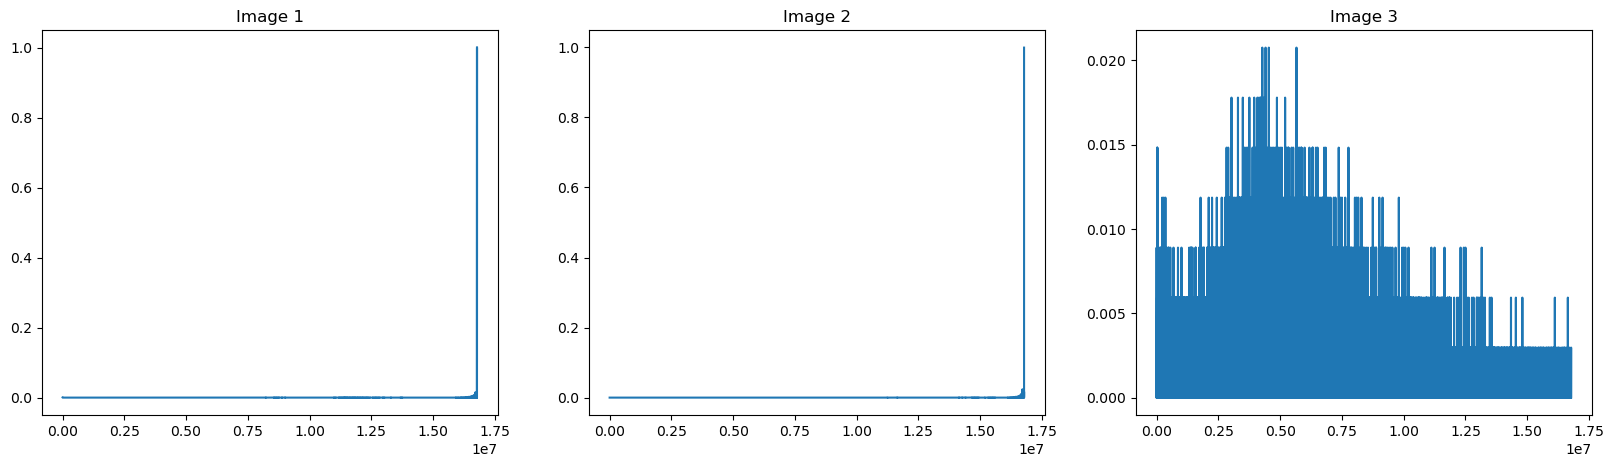

In [6]:
plt.figure(figsize=(20, 5))
for i in range(len(norm_hists)):
    plt.subplot(1, 3, i+1)
    plt.plot(norm_hists[i])
    plt.title(f"Image {i+1}")
plt.show()

In [14]:
distances = [cv2.compareHist(norm_hists[0], norm_hists[i], cv2.HISTCMP_BHATTACHARYYA) for i in range(1, len(norm_hists))]
print(f"Distance between query image and reference image 1: {distances[0]}")
print(f"Distance between query image and reference image 2: {distances[1]}")

Distance between query image and reference image 1: 0.595285678267041
Distance between query image and reference image 2: 0.9976101578007563
